In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from imageio import imread

In [3]:
im = imread("oberg.jpg")/255
a,b,c = im.shape

In [4]:
im_hsv = colors.rgb_to_hsv(im)

In [5]:
I = np.argsort(im_hsv[:,:,0],axis=None)

In [6]:
sorted_im = im.reshape((a*b,c))[I]

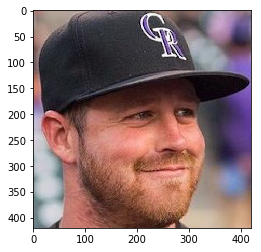

In [7]:
plt.imshow(im)
plt.show()

In [9]:
from matplotlib.colors import rgb_to_hsv
def color_to_coords(image):
    rot_image = np.rot90(image,k=-1)
    hue = rgb_to_hsv(rot_image)[:,:,0]
    mask = np.argsort(hue,axis=None)
    rows,cols = np.unravel_index(mask,shape=rot_image.shape[:2])
    colors = rot_image.reshape((rot_image.shape[0]*rot_image.shape[1],rot_image.shape[2]))[mask]
    return rows+.5,cols+.5,colors

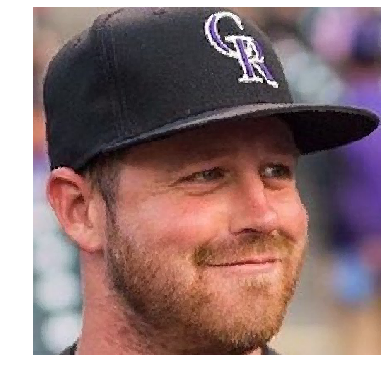

In [11]:
rows1,cols1,colors1 = color_to_coords(im)

aspect_ratio = im.shape[0]/im.shape[1]

fig = plt.figure(figsize=(6.4,aspect_ratio*6.4))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
plt.axis("off")
plt.xlim((0,im.shape[1]))
plt.ylim((0,im.shape[0]))
pixels = im.shape[1]
pixels_per_inch = pixels/6.4
size = 72/pixels_per_inch
points = ax.scatter(rows1,cols1,c=colors1,marker='s',s=size**2)
plt.show()

In [12]:
colors2 = colors1+1

In [17]:
np.linspace(colors1,colors2,5).shape

(5, 176400, 3)

In [18]:
points.set_array(colors2)